## Analyze Winery Wine Quality Results
   
## Table of Contents
- [Introduction](#intro)
- [Part I - Assessing](#assessing)
- [Part II - Appending Data](#appending)
- [Part III - EDA with Visuals](#eda)
- [Part IV - Drawing Conclusions Using Groupby](#groupby)
- [Part V - Drawing Conclusions Using Query](#query)
- [Part VI - Plotting with Matplotlib](#plotting)
- [Part VII - Plotting Wine Type and Quality with Matplotlib](#winetype)
<a id='intro'></a>
### Introduction

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.

Data Set Characteristics: Multivariate
Attribute Characteristics: Real
Associated Tasks:Classification, Regression
Number of Instances: 4898
Number of Attributes: 12
Missing Values? N/A
Area: Business
Date Donated: 2009-10-07
Number of Web Hits: 1290432

**Sourse:** Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009

**Data Set Information:**

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


**Attribute Information:**

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

<a id='assessing'></a>
# Assessing

Using Pandas, explore winequality-red.csv and winequality-white.csv in the Jupyter notebook below to answer quiz questions below the notebook about these characteristics of the datasets:

- number of samples in each dataset
- number of columns in each dataset
- features with missing values
- duplicate rows in the white wine dataset
- number of unique values for quality in each dataset
- mean density of the red wine dataset

Use the space below to explore `winequality-red.csv` and `winequality-white.csv` to answer the quiz questions below.

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

df_r = pd.read_csv('winequality-red.csv', sep = ';')
df_w = pd.read_csv('winequality-white.csv', sep = ';')
df_r.head()
df_w.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [57]:
# review the data
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
color                   1599 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [58]:
# review the data
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
color                   4898 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 497.5+ KB


In [59]:
# answer to question - How many duplicate rows are in the white wine dataset?
sum(df_w.duplicated())

937

In [60]:
# answer to question - How many unique values of quality are in the red wine dataset?
df_r.quality.nunique()

6

In [6]:
# answer to question - How many unique values of quality are in the white wine dataset?
df_w.quality.nunique()

7

In [7]:
# answer to question - What is the mean density in the red wine dataset?
df_r.density.mean()

0.99674667917448401

<a id='appending'></a>
# Appending Data

Use pandas' rename function to change the total_sulfur-dioxide column label to total_sulfur_dioxide.

In [8]:
df_r.rename(columns={'total_sulfur-dioxide':'total_sulfur_dioxide'}, inplace=True)

## Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” 

In [9]:
# create color array for red dataframe
color_red = np.repeat('red', df_r.shape[0])

# create color array for white dataframe
color_white = np.repeat('white', df_w.shape[0])

Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. The cell below does this for the red dataframe.

In [10]:
df_r['color'] = color_red
df_r.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [11]:
df_w['color'] = color_white
df_w.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## Combine DataFrames with Append

In [12]:
# append dataframes
wine_df = df_r.append(df_w)

# view dataframe to check for success
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Save Combined Dataset
Save your newly combined dataframe as `winequality_edited.csv`. Set `index=False` to avoid saving with an unnamed column.

In [13]:
wine_df.to_csv('winequality_edited.csv', index = False)

In [14]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


<a id='eda'></a>
# EDA with Visuals
Perform exploratory data analysis on your newly combined dataframe. Create visualizations to answer the quiz questions below this notebook. 

In [15]:
# Load dataset
% matplotlib inline
df = pd.read_csv('winequality_edited.csv')

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Create Histograms for Various Features

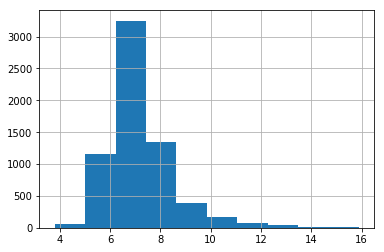

In [16]:
df['fixed_acidity'].hist()

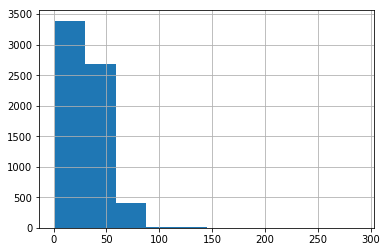

In [17]:
df['free_sulfur_dioxide'].hist()

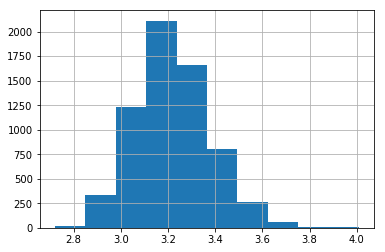

In [18]:
df['pH'].hist()

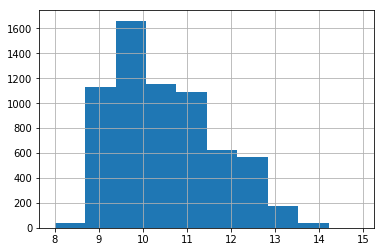

In [19]:
df['alcohol'].hist()

### Scatterplots of Quality Against Various Features

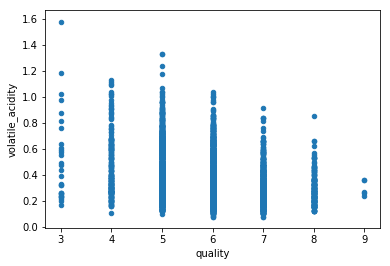

In [20]:
df.plot(y='volatile_acidity', x='quality', kind = 'scatter')

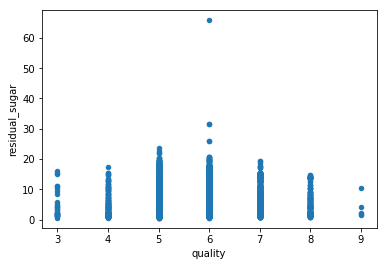

In [21]:
df.plot(y='residual_sugar', x='quality', kind = 'scatter')

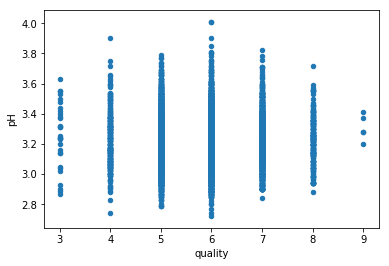

In [22]:
df.plot(y='pH', x='quality', kind = 'scatter')

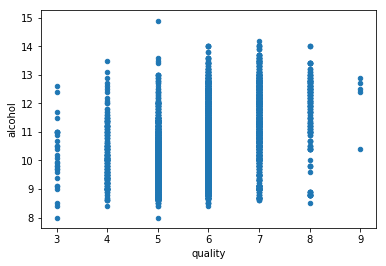

In [23]:
df.plot(y='alcohol', x='quality', kind = 'scatter')

**Q1. Based on histograms of columns in this dataset, which feature variables appear skewed to the right?**

- Fixed Acidity
- Alcohol

**Q2. Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality?**

- Alcohol

<a id='groupby'></a>
# Drawing Conclusions Using Groupby

In the notebook below, we're going to investigate two questions about this data using pandas' groupby function. Here are tips for answering each question:

- **Q1: Is a certain type of wine (red or white) associated with higher quality?**

- **Q2: What level of acidity (pH value) receives the highest average rating?**

**Acidity Levels:**
1. High: Lowest 25% of pH values
2. Moderately High: 25% - 50% of pH values
3. Medium: 50% - 75% of pH values
4. Low: 75% - max pH value

Here, the data is being split at the 25th, 50th, and 75th percentile.

### Is a certain type of wine associated with higher quality?

In [24]:
# Find the mean quality of each wine type (red and white) with groupby
df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

### What level of acidity receives the highest average rating?

In [25]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [26]:
# Bin edges that will be used to "cut" the data into groups
# Fill in this list with five values you just found

bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]

In [27]:
# Labels for the four acidity level groups
# Name each acidity level category
bin_names = [ 'high','mod_high', 'medium', 'low']

In [28]:
# Creates acidity_levels column
df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [29]:
# Find the mean quality of each acidity level with groupby
df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

In [30]:
# Save changes for the next section
df.to_csv('winequality_edited.csv', index=False)

**Q1.Is the mean quality of red wine greater than, less than, or equal to that of white wine?**

- Less

**Q2. What level of acidity receives the highest mean quality rating?**

- Low

<a id='query'></a>
# Drawing Conclusions Using Query

In the notebook below, you're going to investigate two questions about this data using pandas' query function. Here are tips for answering each question:

**Q1: Do wines with higher alcoholic content receive better ratings?**

**Q2: Do sweeter wines (more residual sugar) receive better ratings?**


### Do wines with higher alcoholic content receive better ratings?

In [31]:
# get the median amount of alcohol content
df.alcohol.median()

10.300000000000001

In [32]:
# select samples with alcohol content less than the median
low_alcohol = df.query('alcohol <10.3')

# select samples with alcohol content greater than or equal to the median
high_alcohol = df.query('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() 

True

In [33]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.quality.mean()

5.475920679886686

### Do sweeter wines receive better ratings?

In [34]:
high_alcohol.quality.mean()

6.1460843373493974

In [35]:
# get the median amount of residual sugar
df.residual_sugar.median()

3.0

In [36]:
# select samples with residual sugar less than the median
low_sugar = df.query('residual_sugar < 3')

# select samples with residual sugar greater than or equal to the median
high_sugar = df.query('residual_sugar >= 3')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count()

True

In [37]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar.quality.mean()

5.8088007437248219

In [38]:
high_sugar.quality.mean()

5.8278287461773699

**Q1. Do wines with higher alcoholic content generally receive better ratings?**
- YES

**Q2. Do sweeter wines generally receive higher ratings?**
- Yes

<a id='plotting'></a>
# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [39]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [40]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

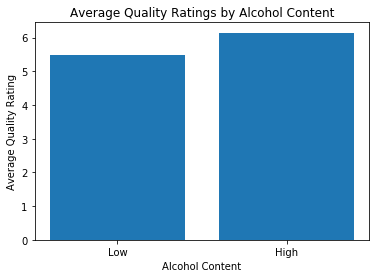

In [41]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [42]:
# Use query to select each group and get its mean quality
median_s = df['residual_sugar'].median()
low = df.query('residual_sugar < {}'.format(median))
high = df.query('residual_sugar >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

Text(0,0.5,'Average Quality Rating')

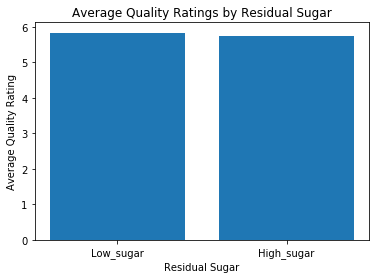

In [43]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low_sugar', 'High_sugar']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating')

### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [44]:
# Use groupby to get the mean quality for each acidity level
acidity_level_quality_means = df.groupby('acidity_levels').quality.mean()
acidity_level_quality_means

acidity_levels
high        5.783343
low         5.859593
medium      5.850832
mod_high    5.784540
Name: quality, dtype: float64

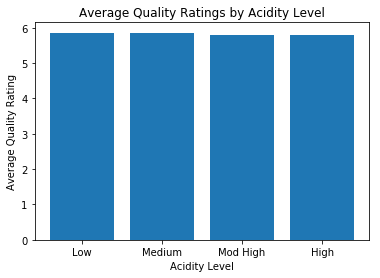

In [45]:
# Create a bar chart with proper labels
locations = [4, 1, 2, 3]  # reorder values above to go from low to high
heights = acidity_level_quality_means

# labels = ['Low', 'Medium', 'Moderately High', 'High']
labels = acidity_level_quality_means.index.str.replace('_', ' ').str.title() # alternative to commented out line above

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

<a id='winetype'></a>
# Plotting Wine Type and Quality with Matplotlib

In [46]:
import seaborn as sns
sns.set_style('darkgrid')

### Create arrays for red bar heights white bar heights
Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [47]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [48]:
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [49]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [50]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

### Plot proportions on a bar chart
Set the x coordinate location for each rating group and and width of each bar.

In [53]:
red_proportions['9'] = 0; red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [55]:
ind = np.arange(len(red_proportions))  # the x locations for the groups

width = 0.35 #the width of the bars

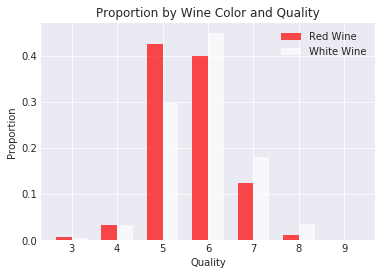

In [56]:
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()